In [1]:
import pandas as pd
df_news = pd.read_pickle('df_daily_news_topic.pickle')
df_social = pd.read_pickle('df_daily_social_topic.pickle')

144
56


(array([19., 49., 83., 92., 79., 68., 32., 13.,  3.,  1.]),
 array([ 56. ,  64.8,  73.6,  82.4,  91.2, 100. , 108.8, 117.6, 126.4,
        135.2, 144. ]),
 <a list of 10 Patch objects>)

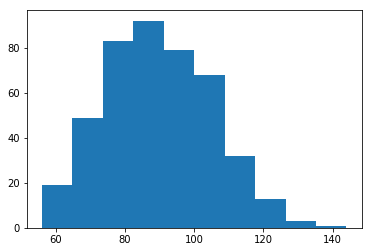

In [8]:
topic_nums = [len(df_news.iloc[i]['key_phrases']) for i in range(df_news.key_phrases.count())]
max_topic_num = max(topic_nums)
print(max_topic_num) 
min_topic_num = min(topic_nums) 
print(min_topic_num) 

import matplotlib.pyplot as plt
plt.hist(topic_nums)

In [3]:
def to_lower_case(df, colname):
    for index, row in df.iterrows():
        l = []
        for pair in row[colname]:
            l.append((pair[0].lower(), pair[1]))
        df.at[index, colname] = l
    return df

df_news = to_lower_case(df_news, 'concepts')
df_news = to_lower_case(df_news, 'key_phrases')
df_social = to_lower_case(df_social, 'concepts')
df_social = to_lower_case(df_social, 'key_phrases')

In [4]:
##Some preprocessing for later use

l = df_news.iloc[-1]['key_phrases']
# to lowercase
l = [(pair[0].lower(), pair[1]) for pair in l]
# ignore common words
trivial = ['a', 'an', 'the', 'and', 'of']
l = [pair for pair in l if pair[0] not in trivial]
# remove parentheses
l = [(pair[0][1:], pair[1]) if pair[0].startswith('(') else pair for pair in l]
l = [(pair[0][:-1], pair[1]) if pair[0].endswith(')') else pair for pair in l]

#[pair for i in range(df_social.concepts.count()) for pair in df_news.iloc[i]['concepts'] if 'bitcoin' in pair[0]]

In [5]:
import numpy as np

words_of_interest_news = []
coins_news = ['bitcoin', 'litecoin', 'ethereum', 'crypto']
jargons_news = ['token', 'platform', 'account', 'blockchain', 'transaction', 'share']
miscellaneous_news = ['dollar', 'money', 'price', 'payment', 'value', 'stock',
                 'increase', 'bubble', 
                 'tech', 'cyber', 'attack', 'security', 'ware', 'digital',
                 'economy', 'financial', 'business', 'industry', 'develop', 'bank', 'supply', 'compan', 'government',
                 'invest', 'market', 'trad', 'exchange']
words_of_interest_news.extend(coins_news)
words_of_interest_news.extend(jargons_news)
words_of_interest_news.extend(miscellaneous_news)
print(len(words_of_interest_news))

words_of_interest_social = []
coins_social = ['bitcoin', 'btc', 'litecoin', 'ltc', 'eth', 'bch', 'ripple', 'neo', 'dash', 'crypto', 'usd']
jargons_social = ['token', 'blockchain', 'mining', 'miners', 'click', 'volatility', 'volume', 'binance']
miscellaneous_social = ['money', 'price', 'payment', 'cash', 'wallet', 'value', 'free', 'fund', 'bonus', 'profit', 
                 'bubble', 'risk', 
                 'tech', 'computer', 'digital',
                 'bank', 'supply', 'compan', 'government',
                 'invest', 'market', 'trad', 'exchange', 'earn']
words_of_interest_social.extend(coins_social)
words_of_interest_social.extend(jargons_social)
words_of_interest_social.extend(miscellaneous_social)
print(len(words_of_interest_social))

def get_word_count(word, df):
    l = []

    for index, row in df.iterrows():
        count = 0
        for pair in row['key_phrases']:
            if word in pair[0]:
                count += pair[1]
        for pair in row['concepts']:
            if word in pair[0]:
                count += pair[1]
        l.append(count)
    return l

def get_count_matrix(df, words_of_interest):
    topic_count = []
    
    for word in words_of_interest:
        topic_count.append(get_word_count(word, df)) 
    
    topic_count_mat = np.asarray(topic_count).T
    return topic_count_mat

37
43


In [6]:
news_topic_count_mat = get_count_matrix(df_news, words_of_interest_news)

df_news_count = pd.DataFrame(data=news_topic_count_mat, index=df_news.index, columns=words_of_interest_news)
df_news_count.columns = [str(col) + '_news' for col in df_news_count.columns]
df_news_count.head()

,bitcoin_news,litecoin_news,ethereum_news,crypto_news,token_news,platform_news,account_news,blockchain_news,transaction_news,share_news,...,industry_news,develop_news,bank_news,supply_news,compan_news,government_news,invest_news,market_news,trad_news,exchange_news
date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,60,0,0,5,0,0,0,0,0,34,...,11,0,26,0,78,0,11,73,0,30
2017-02-02,86,0,0,4,0,25,20,18,0,0,...,0,15,0,0,32,0,41,32,8,15
2017-02-03,18,0,1,6,0,0,1,7,0,0,...,0,0,2,0,2,0,0,0,3,0
2017-02-04,27,0,2,11,0,0,4,0,3,0,...,0,0,0,0,2,0,0,1,3,2
2017-02-05,41,0,0,13,0,20,2,3,10,2,...,0,10,2,0,13,0,2,12,0,10


In [7]:
social_topic_count_mat = get_count_matrix(df_social, words_of_interest_social)

df_social_count = pd.DataFrame(data=social_topic_count_mat, index=df_social.index, columns=words_of_interest_social)
df_social_count.columns = [str(col) + '_social' for col in df_social_count.columns]
df_social_count.tail()

,bitcoin_social,btc_social,litecoin_social,ltc_social,eth_social,bch_social,ripple_social,neo_social,dash_social,crypto_social,...,digital_social,bank_social,supply_social,compan_social,government_social,invest_social,market_social,trad_social,exchange_social,earn_social
date,,,,,,,,,,,,,,,,,,,,,
2018-04-11,73180,1548,991,0,15045,0,991,0,0,27724,...,0,3765,0,0,0,7207,5871,10454,0,3569
2018-04-12,70529,2530,4340,0,16536,0,1459,0,0,21704,...,0,2920,0,0,0,6304,6617,9161,2660,4304
2018-04-13,55377,1632,0,0,13678,0,0,1007,0,17524,...,0,2913,0,0,0,5530,1164,9761,0,4182
2018-04-14,58232,2021,928,0,15649,0,928,1810,0,17084,...,0,3082,0,0,0,4324,1131,9178,0,3559
2018-04-15,60455,3859,0,0,23145,0,953,1965,0,20413,...,0,3161,0,0,0,4739,5214,10116,0,4028
